<a href="https://colab.research.google.com/github/poojithakotari/final-project-2-guvi/blob/main/Final_Project_2_item.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the file
dataset = pd.read_csv("train 2.csv")
dataset

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
#change the date column datatype object to datetime 
from datetime import datetime, timedelta, date

dataset['date'] = pd.to_datetime(dataset['date'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
dataset.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
dataset.isnull().sum() # no null values and no duplicate rows

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
dataset['store'].unique()
#dataset.store.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
dataset.store.nunique()

10

In [ ]:
dataset.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
dataset.item.nunique()

50

**Feture Engineering**

In [ ]:
# Convert the date column to a datetime object
dataset['date'] = pd.to_datetime(dataset['date'])

In [ ]:
# Create new columns for year, month, and day
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

In [ ]:
dataset

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27
912996,2017-12-28,10,50,59,2017,12,28
912997,2017-12-29,10,50,74,2017,12,29
912998,2017-12-30,10,50,62,2017,12,30


**EDA**

In [ ]:
#Sales Data Per Item

def total_sales_per_item(df):
    sales_by_item = df.groupby('item')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(20,8))
    sns.barplot(sales_by_item.item, sales_by_item.sales, order=sales_by_item.sort_values('sales', ascending = False).item)
    
    ax.set(xlabel = "Item Id", ylabel = "Sum of Sales", title = "Total Sales Per Item")
    plt.xticks(fontsize=12, rotation=90)
    
    return sales_by_item

,item,sales
0,1,401384
1,2,1069564
2,3,669087
3,4,401907
4,5,335230
5,6,1068281
6,7,1068777
7,8,1405108
8,9,938379
9,10,1337133


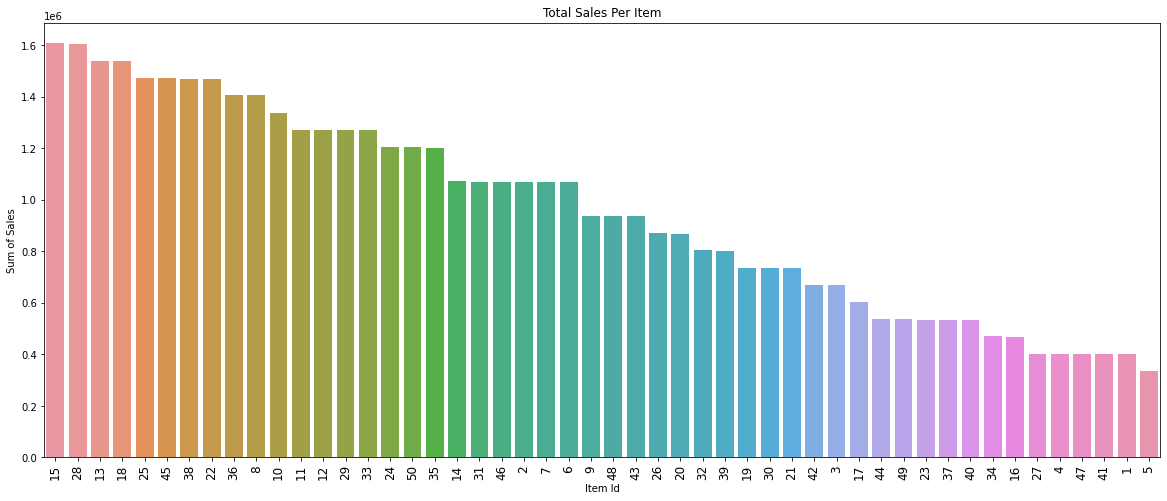

In [ ]:
total_sales_per_item(dataset)

In [ ]:
#Sales Data Per Store

def total_sales_per_store(df):
    sales_by_store = df.groupby('store')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(sales_by_store.store, sales_by_store.sales, order=sales_by_store.sort_values('sales',ascending = False).store)
    
    ax.set(xlabel = "Store Id", ylabel = "Sum of Sales", title = "Total Sales Per Store")
    plt.xticks(fontsize=12, rotation=45)
    
    return sales_by_store

,store,sales
0,1,4315603
1,2,6120128
2,3,5435144
3,4,5012639
4,5,3631016
5,6,3627670
6,7,3320009
7,8,5856169
8,9,5025976
9,10,5360158


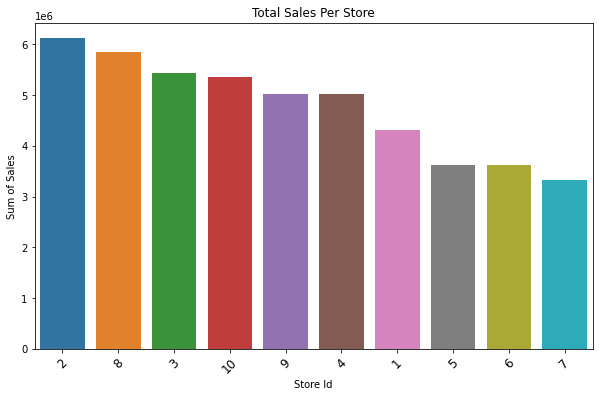

In [ ]:
total_sales_per_store(dataset)

In [ ]:
daily_sales = dataset.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = dataset.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = dataset.groupby(['item', 'date'], as_index=False)['sales'].sum()

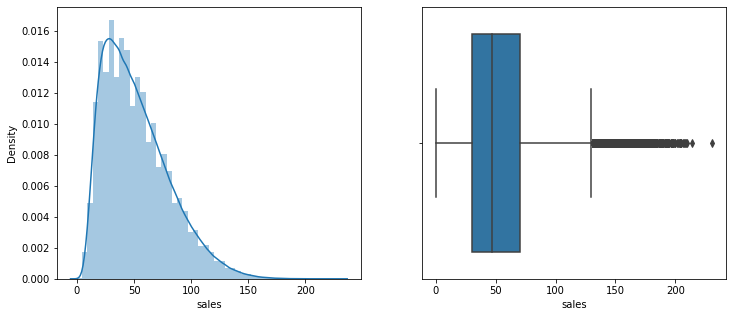

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset['sales'])
  
plt.subplot(1, 2, 2)
sns.boxplot(dataset['sales'])
plt.show()

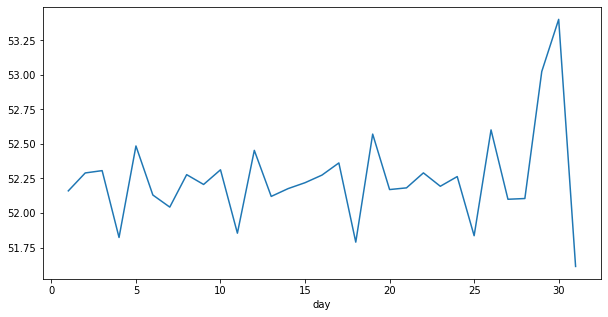

In [ ]:
plt.figure(figsize=(10,5))
dataset.groupby('day').mean()['sales'].plot()
plt.show()

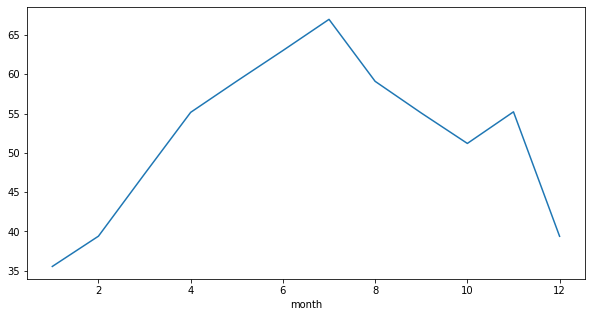

In [ ]:
plt.figure(figsize=(10,5))
dataset.groupby('month').mean()['sales'].plot()
plt.show()

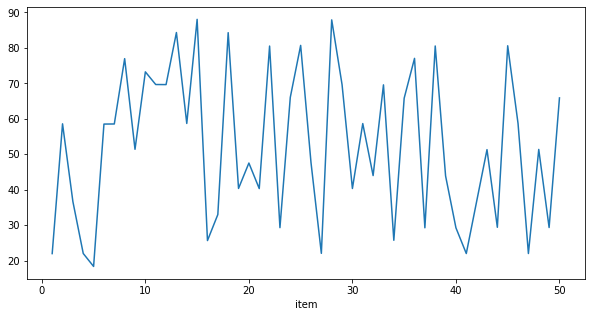

In [ ]:
plt.figure(figsize=(10,5))
dataset.groupby('item').mean()['sales'].plot()
plt.show()

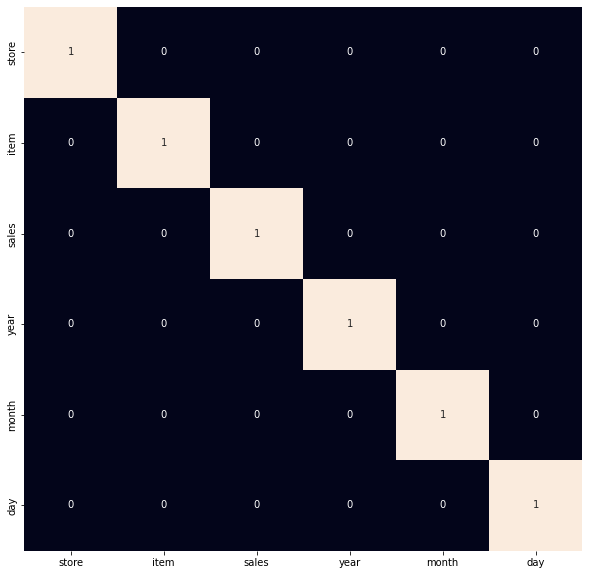

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
 4   year    913000 non-null  int64         
 5   month   913000 non-null  int64         
 6   day     913000 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 48.8 MB


In [ ]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(dataset, test_size=0.2, random_state=42)

# Define the input features and the target variable
features = ['store', 'item', 'year', 'month', 'day']
target = 'sales'

# Train a linear regression model
lr = LinearRegression()
lr.fit(train_df[features], train_df[target])

LinearRegression()

In [ ]:
# Make predictions on the validation set
val_df['pred_sales'] = lr.predict(val_df[features])

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import r2_score
#mse = mean_squared_error(val_df[target], val_df['pred_sales'])
r2 = r2_score(val_df[target], val_df['pred_sales'])

#print('Mean squared error: ', mse)
print('R-squared: ', r2)


R-squared:  0.045309008585681765


In [ ]:
# Forecast sales for the next 3 months
last_date = dataset['date'].max()
forecast_dates = dataset.groupby('store')['sales'].sum().reset_index()
forecast_dates = pd.date_range(last_date, periods=365, freq='D')[1:]
forecast_df = pd.DataFrame({'date': forecast_dates})
forecast_df

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
359,2018-12-26
360,2018-12-27
361,2018-12-28
362,2018-12-29


In [ ]:
# Add the year, month, and day columns to the forecast data
forecast_df['year'] = forecast_df['date'].dt.year
forecast_df['month'] = forecast_df['date'].dt.month
forecast_df['day'] = forecast_df['date'].dt.day
forecast_df

,date,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
359,2018-12-26,2018,12,26
360,2018-12-27,2018,12,27
361,2018-12-28,2018,12,28
362,2018-12-29,2018,12,29


In [ ]:
# Add the store and item columns
stores = dataset['store'].unique()
items = dataset['item'].unique()
forecast_rows = []
for store in stores:
    for item in items:
        forecast_rows.append({'store': store, 'item': item})
forecast_df = pd.DataFrame(forecast_rows).merge(forecast_df,left_index=True, right_index=True)

forecast_df


,store,item,date,year,month,day
0,1,1,2018-01-01,2018,1,1
1,1,2,2018-01-02,2018,1,2
2,1,3,2018-01-03,2018,1,3
3,1,4,2018-01-04,2018,1,4
4,1,5,2018-01-05,2018,1,5
...,...,...,...,...,...,...
359,8,10,2018-12-26,2018,12,26
360,8,11,2018-12-27,2018,12,27
361,8,12,2018-12-28,2018,12,28
362,8,13,2018-12-29,2018,12,29


In [ ]:
# Make predictions on the forecast data
forecast_df['sales'] = lr.predict(forecast_df[features])

# Aggregate the sales by date
agg_forecast_df = forecast_df.groupby('date', as_index=False)['sales'].sum()

print(agg_forecast_df)

          date      sales
0   2018-01-01  62.309059
1   2018-01-02  62.204306
2   2018-01-03  62.099553
3   2018-01-04  61.994800
4   2018-01-05  61.890046
..         ...        ...
359 2018-12-26  68.929877
360 2018-12-27  68.825124
361 2018-12-28  68.720371
362 2018-12-29  68.615618
363 2018-12-30  68.510865

[364 rows x 2 columns]
